# Libs Importing

In [1]:
import pandas as pd
import plotly.graph_objects as go

# Data Loading

In [2]:
path = "../data/raw/nvidia_stock.csv"
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040112,0.044767,0.035575,0.037605,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040589,0.042021,0.037605,0.041545,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042021,0.042857,0.037724,0.038321,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038440,0.039395,0.036291,0.038202,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038202,0.038440,0.037843,0.038082,227520000,0.0,0.0


# Graphs and Analysis

## Close and Open Prices Over Time

In [3]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Price Close',
    line=dict(width=2)
))

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Open'],
    mode='lines',
    name='Price Open',
    opacity=0.7
))

fig.update_layout(
    title='Time Series - NVIDIA Stock Prices (Close vs Open)',
    xaxis_title='Data',
    yaxis_title='Preço (USD)',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(count=1, label="1A", step="year", stepmode="backward"),
                dict(count=5, label="5A", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ]
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()


In [4]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Closing Price',
    line=dict(width=3, color='#0B3C5D')
))

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Open'],
    mode='lines',
    name='Opening Price',
    line=dict(width=2, color='#4A90E2'), 
    opacity=0.8
))

fig.update_layout(
    title=dict(
        text='NVIDIA (NVDA) — Stock Prices',
        x=0.5,
        font=dict(size=20)
    ),
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    width=1000,
    height=500,
    template='plotly_white',
    hovermode=False,
    legend=dict(
        orientation='h',
        x=0.5,
        xanchor='center',
        y=1.05
    ),
    margin=dict(l=60, r=40, t=70, b=60)
)

fig.update_xaxes(
    showgrid=False,
    type='date',
    dtick="M12", 
    tickformat="%Y", 
    tickangle=0  
)

fig.update_yaxes(
    showgrid=True,
    gridcolor='rgba(0,0,0,0.08)'
)

fig.show()

In [3]:
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_localize(None)

df_filtered = df[df['Date'] >= pd.to_datetime('2017-01-01')]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_filtered['Date'],
    y=df_filtered['Close'],
    mode='lines',
    name='Closing Price',
    line=dict(width=3, color='#0B3C5D')  
))

fig.add_trace(go.Scatter(
    x=df_filtered['Date'],
    y=df_filtered['Open'],
    mode='lines',
    name='Opening Price',
    line=dict(width=2, color='#4A90E2'),  
    opacity=0.8
))

fig.update_layout(
    title=dict(
        text='NVIDIA (NVDA) — Stock Prices (2017-2025)',
        x=0.5,
        font=dict(size=20)
    ),
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    width=1000,
    height=500,
    template='plotly_white',
    hovermode=False,
    legend=dict(
        orientation='h',
        x=0.5,
        xanchor='center',
        y=1.05
    ),
    margin=dict(l=60, r=40, t=70, b=60)
)

fig.update_xaxes(
    showgrid=False,
    type='date',
    dtick="M12", 
    tickformat="%Y", 
    tickangle=0  
)

fig.update_yaxes(
    showgrid=True,
    gridcolor='rgba(0,0,0,0.08)'
)

fig.show()

In [15]:
all_size = df.shape[0]
highest_2017_2024 = df_filtered.shape[0]

In [ ]:
# Criar gráfico de barras comparando tamanhos dos datasets
fig = go.Figure()

categories = ['All Dataset', 'Filtered Dataset (2017-2024)']
values = [all_size, highest_2017_2024]
colors = ['#1e3a8a', '#60a5fa']  

# Calcular porcentagens
percentage_total = 100.0
percentage_filtered = (highest_2017_2024 / all_size) * 100

fig.add_trace(go.Bar(
    x=categories,
    y=values,
    marker=dict(
        color=colors,
        line=dict(color='rgba(30, 58, 138, 0.8)', width=2)
    ),
    text=[
        f'{values[0]:,} ({percentage_total:.0f}%)',
        f'{values[1]:,} ({percentage_filtered:.1f}%)'
    ],
    textposition='outside',
    textfont=dict(size=14, color='#1e3a8a', family='Arial Black'),
    hovertemplate='<b>%{x}</b><br>' +
                  'Records: %{y:,}<br>' +
                  '<extra></extra>'
))

fig.update_layout(
    title=dict(
        text='<b>Comparison of Dataset Sizes</b><br><sub>NVIDIA Stock Data Analysis</sub>',
        x=0.5,
        font=dict(size=22, color='#1e3a8a', family='Arial Black'),
        pad=dict(b=20)
    ),
    xaxis=dict(
        title=dict(
            text='<b>Dataset Type</b>',
            font=dict(size=14, color='#374151')
        ),
        tickfont=dict(size=12, color='#374151'),
        showgrid=False
    ),
    yaxis=dict(
        title=dict(
            text='<b>Number of Records</b>',
            font=dict(size=14, color='#374151')
        ),
        tickfont=dict(size=12, color='#374151'),
        showgrid=True,
        gridcolor='rgba(0,0,0,0.05)',
        gridwidth=1
    ),
    width=900,
    height=600,
    template='plotly_white',
    margin=dict(l=80, r=80, t=120, b=80),
    plot_bgcolor='rgba(248, 250, 252, 0.8)',
    paper_bgcolor='white'
)



fig.update_traces(
    marker_line_width=2,
    selector=dict(type='bar')
)

fig.show()

### Distribution of Close Prices

In [26]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Distribuição dos preços de fechamento no dataset filtrado (2017-2024)
fig = go.Figure()

# Histogram
fig.add_trace(go.Histogram(
    x=df_filtered['Close'],
    nbinsx=50,
    name='Distribuição',
    marker=dict(
        color='#60a5fa',
        opacity=0.7,
        line=dict(color='#1e3a8a', width=1.5)
    ),
    hovertemplate='<b>Preço:</b> $%{x:.2f}<br>' +
                  '<b>Frequência:</b> %{y}<br>' +
                  '<extra></extra>'
))

# Estatísticas descritivas
mean_price = df_filtered['Close'].mean()
median_price = df_filtered['Close'].median()
std_price = df_filtered['Close'].std()

# Adicionar linhas de referência
fig.add_vline(
    x=mean_price, 
    line_dash="dash", 
    line_color="red",
    annotation_text=f"Média: ${mean_price:.2f}",
    annotation_position="top"
)

fig.add_vline(
    x=median_price, 
    line_dash="dot", 
    line_color="orange",
    annotation_text=f"Mediana: ${median_price:.2f}",
    annotation_position="top right"
)

fig.update_layout(
    title=dict(
        text='<b>Distribuição dos Preços de Fechamento</b><br><sub>NVIDIA Dataset Filtrado (2017-2024)</sub>',
        x=0.5,
        font=dict(size=20, color='#1e3a8a', family='Arial Black')
    ),
    xaxis=dict(
        title='<b>Preço de Fechamento (USD)</b>',
        tickformat='$,.0f',
        showgrid=True,
        gridcolor='rgba(0,0,0,0.1)'
    ),
    yaxis=dict(
        title='<b>Frequência</b>',
        showgrid=True,
        gridcolor='rgba(0,0,0,0.1)'
    ),
    width=900,
    height=600,
    template='plotly_white',
    showlegend=False,
    margin=dict(l=80, r=80, t=100, b=80)
)

# Adicionar texto com estatísticas
stats_text = f"""
<b>Estatísticas Descritivas:</b><br>
• Média: ${mean_price:.2f}<br>
• Mediana: ${median_price:.2f}<br>
• Desvio Padrão: ${std_price:.2f}<br>
• Mínimo: ${df_filtered['Close'].min():.2f}<br>
• Máximo: ${df_filtered['Close'].max():.2f}<br>
• Total de registros: {len(df_filtered):,}
"""

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=0.98,
    text=stats_text,
    showarrow=False,
    font=dict(size=11, color='#374151'),
    align="left",
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="#1e3a8a",
    borderwidth=1,
    borderpad=10,
    xanchor="right",
    yanchor="top"
)

fig.show()

In [5]:
cols_to_drop = ['Dividends', 'Stock Splits']
df_filtered.drop(columns=cols_to_drop, inplace=True)
df_filtered

/tmp/ipykernel_5356/21402211.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume
4516,2017-01-03 05:00:00,2.571066,2.619581,2.447438,2.512207,1501996000
4517,2017-01-04 05:00:00,2.546439,2.598156,2.500386,2.570820,1199220000
4518,2017-01-05 05:00:00,2.574268,2.606037,2.488566,2.505558,984296000
4519,2017-01-06 05:00:00,2.532894,2.567372,2.492259,2.539051,822856000
4520,2017-01-09 05:00:00,2.548901,2.659723,2.548901,2.641992,916248000
...,...,...,...,...,...,...
6775,2025-12-29 05:00:00,187.710007,188.759995,185.910004,188.220001,120006100
6776,2025-12-30 05:00:00,188.240005,188.990005,186.929993,187.539993,97687300
6777,2025-12-31 05:00:00,189.570007,190.559998,186.490005,186.500000,120100500
6778,2026-01-02 05:00:00,189.839996,192.929993,188.259995,188.850006,147941400


In [9]:
df_filtered.index = range(len(df_filtered))
df_filtered.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

## High and Low Prices Over Time

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['High'],
    mode='lines',
    name='Preço Máximo',
    line=dict(width=2)
))

fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Low'],
    mode='lines',
    name='Preço Mínimo',
    opacity=0.7
))

fig.update_layout(
    title='Série Temporal - Ações NVIDIA | Preço Máximo e Mínimo',
    xaxis_title='Data',
    yaxis_title='Preço (USD)',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(count=1, label="1A", step="year", stepmode="backward"),
                dict(count=5, label="5A", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ]
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()


## Dividends and Volume Over Time

In [16]:
import pandas as pd
import plotly.graph_objects as go

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['Volume'],
    mode='lines',
    name='Volume',
    opacity=0.7
))

fig.update_layout(
    title='Série Temporal - Ações NVIDIA | Volume',
    xaxis_title='Data',
    yaxis_title='Volume',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(count=1, label="1A", step="year", stepmode="backward"),
                dict(count=5, label="5A", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ]
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()


## Split Close and Open Prices Over Time

In [19]:
# date > 2010
df_filtered = df[pd.to_datetime(df['Date']) > pd.to_datetime('2010-01-01')]
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=df_filtered['Date'],
    y=df_filtered['Close'],
    mode='lines',
    name='Close',
    opacity=0.7
))

fig.update_layout(
    title='Série Temporal - Ações NVIDIA | Close Price Since 2010',
    xaxis_title='Data',
    yaxis_title='Close Price (USD)',
    hovermode='x unified',
    width=1000,
    height=500
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=[
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(count=6, label="6M", step="month", stepmode="backward"),
                dict(count=1, label="1A", step="year", stepmode="backward"),
                dict(count=5, label="5A", step="year", stepmode="backward"),
                dict(step="all", label="Tudo")
            ]
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

2026-01-07 18:38:49.401318: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-07 18:38:49.438135: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-07 18:38:50.533563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/lucas/nvidia-lstm-forecast/venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning:

In the future `np.object` will be defined as the corresponding NumPy scalar.

E0000 00:00:1767821930.905586    5356 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading 

MODELO LSTM PARA PREVISÃO DE PREÇO DE FECHAMENTO - NVIDIA

Total de registros: 2264
Período: 2017-01-03 05:00:00 até 2026-01-05 05:00:00

Dados de treino: 1763 amostras
Dados de teste: 441 amostras

CONSTRUINDO MODELO LSTM


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)


TREINANDO MODELO
Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 3.5666e-04 - val_loss: 0.0012
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.5856e-05 - val_loss: 3.4678e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.1728e-05 - val_loss: 3.3089e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.2881e-05 - val_loss: 2.9485e-04
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.6528e-05 - val_loss: 3.2106e-04
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.5029e-05 - val_loss: 7.1622e-04
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.9036e-05 - val_loss: 3.9965e-04
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.1535e-05 - val_loss: 2.6874e-04
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.2857e-05 - val_loss: 2.4418e-04
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.8437e-05 - val_loss: 2.4540e-04
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - l

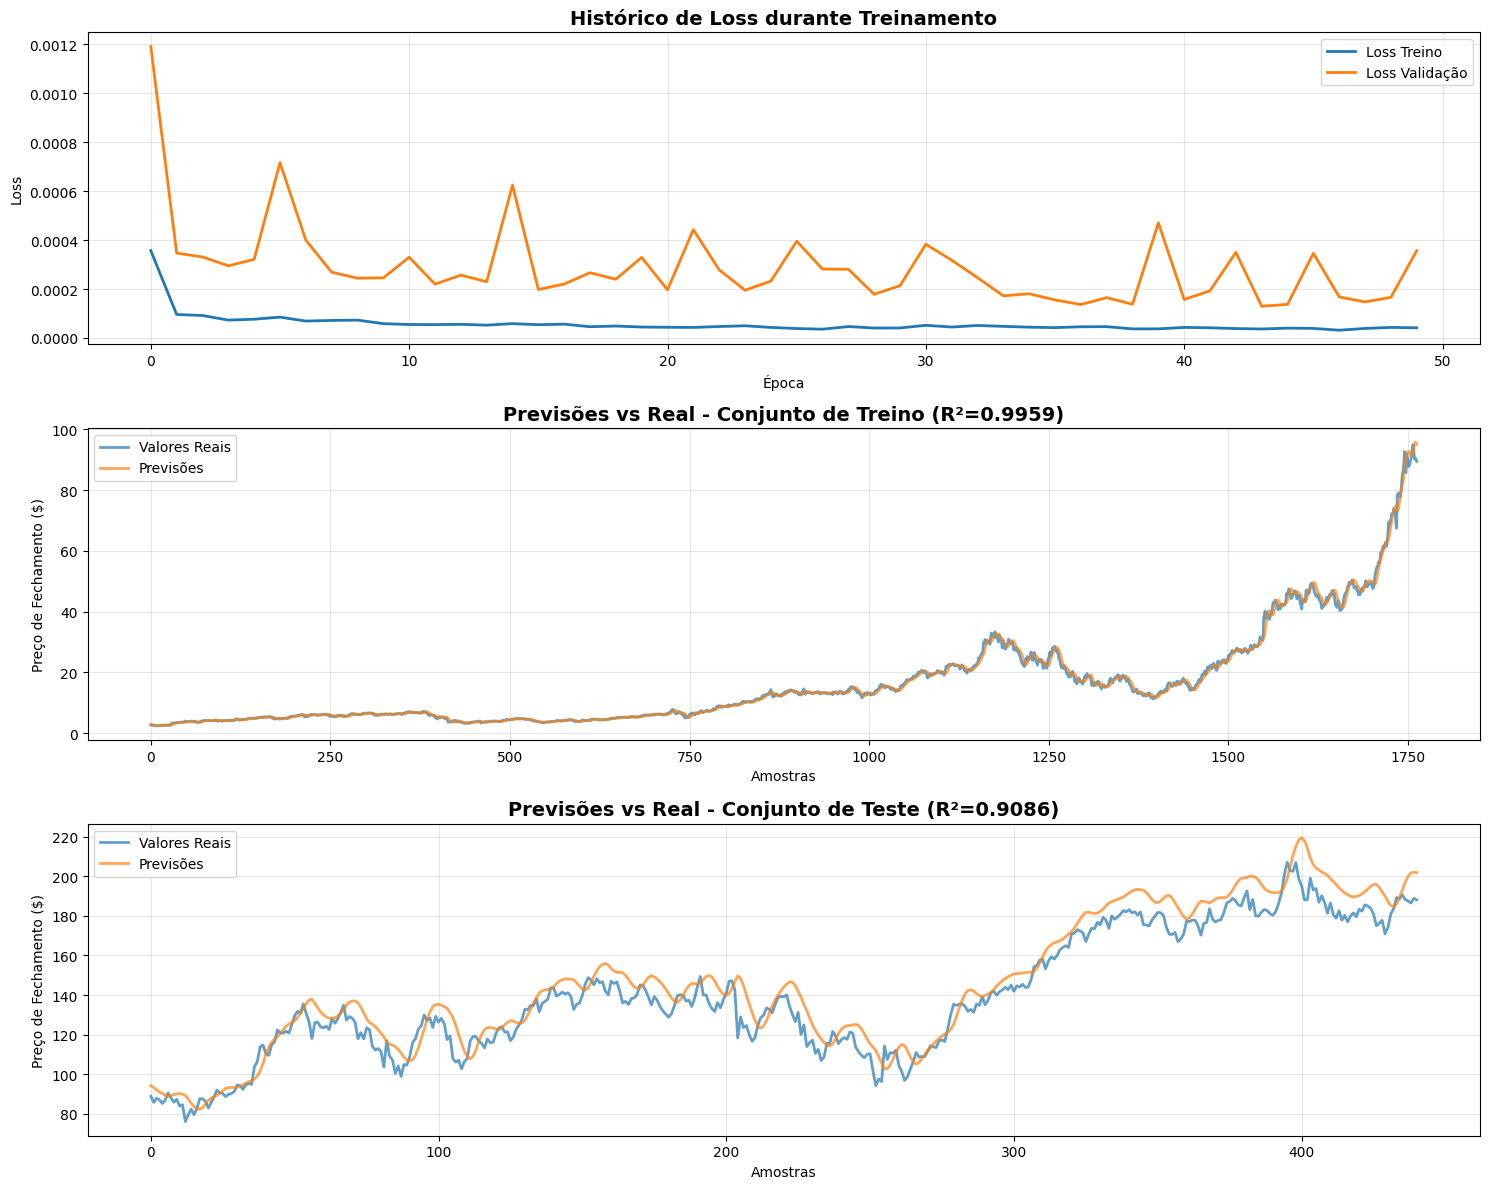


PREVISÃO PARA OS PRÓXIMOS 30 DIAS

Previsões de preço de fechamento:
  2026-01-06: $201.27
  2026-01-07: $202.49
  2026-01-08: $205.28
  2026-01-09: $209.14
  2026-01-10: $213.62
  2026-01-11: $218.50
  2026-01-12: $223.64
  2026-01-13: $229.00
  2026-01-14: $234.56
  2026-01-15: $240.32
  ...


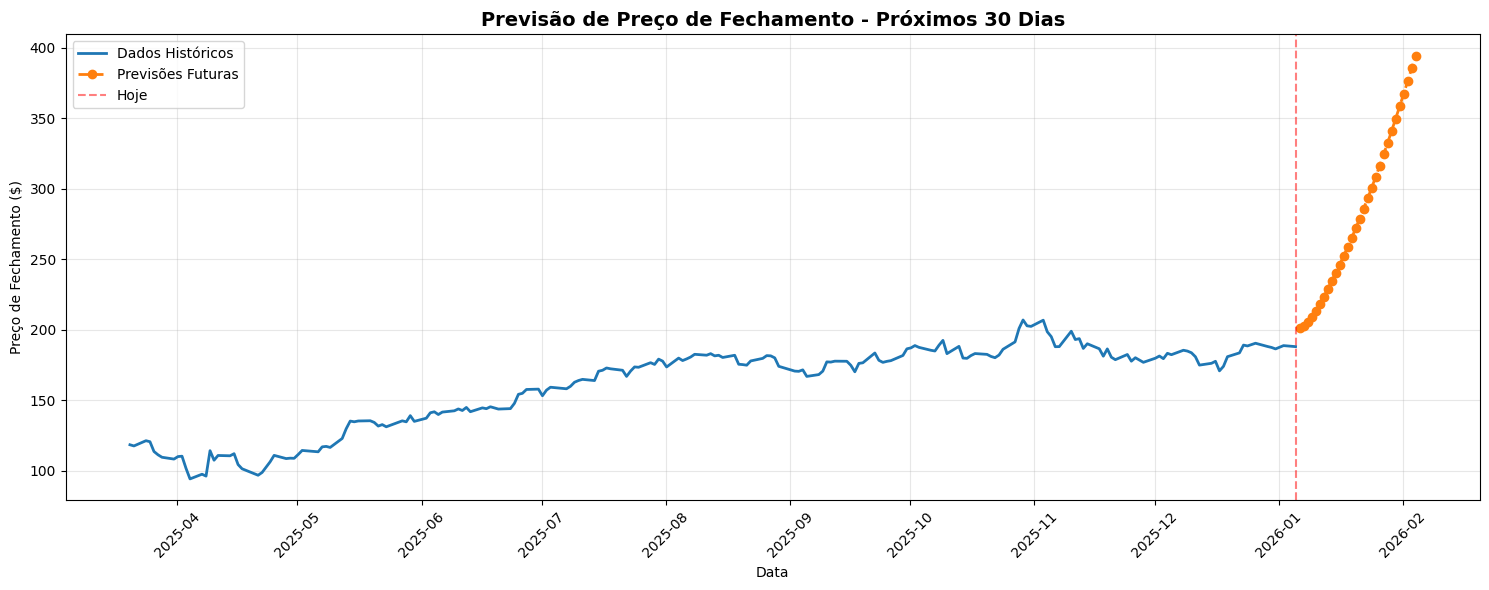


ANÁLISE CONCLUÍDA!

Arquivos gerados:
  - lstm_predictions.png: Gráficos de avaliação do modelo
  - future_predictions.png: Previsões para os próximos 30 dias


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Configurações
LOOK_BACK = 60  # Janela de tempo (dias anteriores para prever)
TRAIN_SIZE = 0.8  # 80% para treino
EPOCHS = 50
BATCH_SIZE = 32

# 1. PREPARAÇÃO DOS DADOS
print("="*60)
print("MODELO LSTM PARA PREVISÃO DE PREÇO DE FECHAMENTO - NVIDIA")
print("="*60)

# Assumindo que df_filtered já está carregado
# Se não estiver, descomente a linha abaixo:
# df_filtered = pd.read_csv('seu_arquivo.csv')

# Ordenar por data
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered.sort_values('Date')
df_filtered.reset_index(drop=True, inplace=True)

print(f"\nTotal de registros: {len(df_filtered)}")
print(f"Período: {df_filtered['Date'].min()} até {df_filtered['Date'].max()}")

# Selecionar apenas a coluna Close para previsão
data = df_filtered[['Close']].values

# 2. NORMALIZAÇÃO DOS DADOS
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. CRIAR SEQUÊNCIAS PARA LSTM
def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, LOOK_BACK)

# Reshape para [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# 4. DIVISÃO TREINO/TESTE
train_size = int(len(X) * TRAIN_SIZE)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nDados de treino: {X_train.shape[0]} amostras")
print(f"Dados de teste: {X_test.shape[0]} amostras")

# 5. CONSTRUÇÃO DO MODELO LSTM
print("\n" + "="*60)
print("CONSTRUINDO MODELO LSTM")
print("="*60)

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(LOOK_BACK, 1)),
    Dropout(0.2),
    
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    
    LSTM(units=50),
    Dropout(0.2),
    
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 6. TREINAMENTO
print("\n" + "="*60)
print("TREINANDO MODELO")
print("="*60)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

# 7. PREVISÕES
print("\n" + "="*60)
print("GERANDO PREVISÕES")
print("="*60)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Desnormalizar previsões
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 8. MÉTRICAS DE AVALIAÇÃO
print("\nMÉTRICAS DE DESEMPENHO:")
print("-"*60)

# Treino
train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predict))
train_mae = mean_absolute_error(y_train_actual, train_predict)
train_r2 = r2_score(y_train_actual, train_predict)

print(f"TREINO:")
print(f"  RMSE: ${train_rmse:.2f}")
print(f"  MAE:  ${train_mae:.2f}")
print(f"  R²:   {train_r2:.4f}")

# Teste
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predict))
test_mae = mean_absolute_error(y_test_actual, test_predict)
test_r2 = r2_score(y_test_actual, test_predict)

print(f"\nTESTE:")
print(f"  RMSE: ${test_rmse:.2f}")
print(f"  MAE:  ${test_mae:.2f}")
print(f"  R²:   {test_r2:.4f}")

# 9. VISUALIZAÇÕES
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Gráfico 1: Loss durante treinamento
axes[0].plot(history.history['loss'], label='Loss Treino', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Loss Validação', linewidth=2)
axes[0].set_title('Histórico de Loss durante Treinamento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Época')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Previsões vs Real (Conjunto de Treino)
axes[1].plot(y_train_actual, label='Valores Reais', linewidth=2, alpha=0.7)
axes[1].plot(train_predict, label='Previsões', linewidth=2, alpha=0.7)
axes[1].set_title(f'Previsões vs Real - Conjunto de Treino (R²={train_r2:.4f})', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Amostras')
axes[1].set_ylabel('Preço de Fechamento ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Previsões vs Real (Conjunto de Teste)
axes[2].plot(y_test_actual, label='Valores Reais', linewidth=2, alpha=0.7)
axes[2].plot(test_predict, label='Previsões', linewidth=2, alpha=0.7)
axes[2].set_title(f'Previsões vs Real - Conjunto de Teste (R²={test_r2:.4f})', 
                  fontsize=14, fontweight='bold')
axes[2].set_xlabel('Amostras')
axes[2].set_ylabel('Preço de Fechamento ($)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. PREVISÃO PARA OS PRÓXIMOS DIAS
print("\n" + "="*60)
print("PREVISÃO PARA OS PRÓXIMOS 30 DIAS")
print("="*60)

# Usar os últimos LOOK_BACK dias para prever o futuro
last_sequence = data_scaled[-LOOK_BACK:]
future_predictions = []

current_sequence = last_sequence.copy()

for i in range(30):
    current_sequence_reshaped = current_sequence.reshape(1, LOOK_BACK, 1)
    next_pred = model.predict(current_sequence_reshaped, verbose=0)
    future_predictions.append(next_pred[0, 0])
    
    # Atualizar sequência
    current_sequence = np.append(current_sequence[1:], next_pred[0, 0])

# Desnormalizar previsões futuras
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Criar datas futuras
last_date = df_filtered['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Exibir previsões
print("\nPrevisões de preço de fechamento:")
for date, price in zip(future_dates[:10], future_predictions[:10]):
    print(f"  {date.strftime('%Y-%m-%d')}: ${price[0]:.2f}")
print(f"  ...")

# Visualizar previsões futuras
plt.figure(figsize=(15, 6))
plt.plot(df_filtered['Date'].iloc[-200:], df_filtered['Close'].iloc[-200:], 
         label='Dados Históricos', linewidth=2)
plt.plot(future_dates, future_predictions, 
         label='Previsões Futuras', linewidth=2, linestyle='--', marker='o')
plt.axvline(x=last_date, color='red', linestyle='--', alpha=0.5, label='Hoje')
plt.title('Previsão de Preço de Fechamento - Próximos 30 Dias', 
          fontsize=14, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('future_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("ANÁLISE CONCLUÍDA!")
print("="*60)
print("\nArquivos gerados:")
print("  - lstm_predictions.png: Gráficos de avaliação do modelo")
print("  - future_predictions.png: Previsões para os próximos 30 dias")